In [1]:
import pandas as pd
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import numpy as np
import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(bottom=0.15)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
movie_credit_file = './tmdb-5000-movie-dataset/tmdb_5000_credits.csv'
movie_file = './tmdb-5000-movie-dataset/tmdb_5000_movies.csv'

In [4]:
df_credit_file = pd.read_csv(movie_credit_file)
df_movie_file = pd.read_csv(movie_file)

In [5]:
df_credit_file = df_credit_file.rename(columns = {'movie_id': 'id', 'title': 'original_title', 'cast':'cast', 'crew':'crew'})

In [6]:
df_merged = df_movie_file.merge(df_movie_file, how='left', on = 'original_title' )

In [7]:
df_data_download = df_merged[['id_x','original_title']]

In [9]:
df_credit_file.columns

Index(['id', 'original_title', 'cast', 'crew'], dtype='object')

In [10]:
df_id_title = df_credit_file[['id', 'original_title']]

In [11]:
df_budget = df_movie_file.groupby(['budget']).count()

In [12]:
df_genre = df_movie_file.groupby(['genres']).count()

In [35]:
# df_genre.plot(kind='bar', legend=False, figsize=(15,5))
# # plot=df_genre.plot(kind='bar', legend=False, figsize=(40,5))
# # fig = plot.get_figure()
# # fig.savefig("output.eps")

In [13]:
df_merged.columns

Index(['budget_x', 'genres_x', 'homepage_x', 'id_x', 'keywords_x',
       'original_language_x', 'original_title', 'overview_x', 'popularity_x',
       'production_companies_x', 'production_countries_x', 'release_date_x',
       'revenue_x', 'runtime_x', 'spoken_languages_x', 'status_x', 'tagline_x',
       'title_x', 'vote_average_x', 'vote_count_x', 'budget_y', 'genres_y',
       'homepage_y', 'id_y', 'keywords_y', 'original_language_y', 'overview_y',
       'popularity_y', 'production_companies_y', 'production_countries_y',
       'release_date_y', 'revenue_y', 'runtime_y', 'spoken_languages_y',
       'status_y', 'tagline_y', 'title_y', 'vote_average_y', 'vote_count_y'],
      dtype='object')

In [14]:
minBudget = 10000

df_dropped_minBudgets = df_merged.loc[df_merged['budget_x'] > minBudget]

In [15]:
print(len(df_merged))
print(len(df_dropped_minBudgets))

4807
3732


In [16]:
df_budget = df_dropped_minBudgets.groupby(['budget_x']).count()

/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


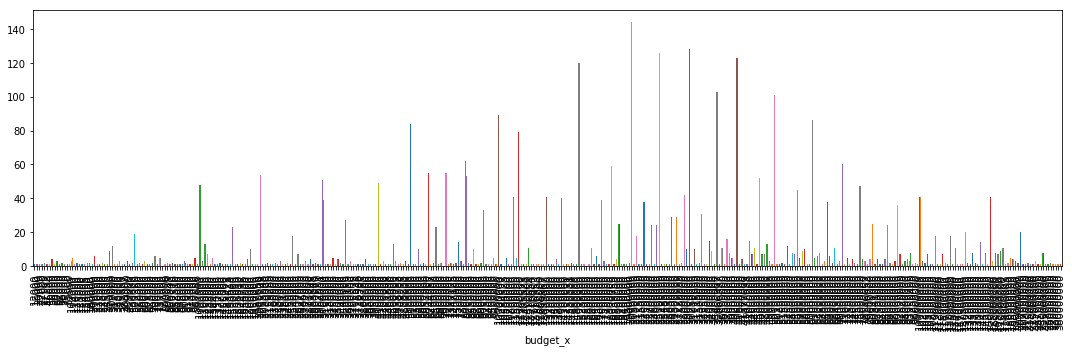

In [17]:
df_budget.plot(kind='bar', legend=False, figsize=(15,5))

In [18]:
df_dropped_minBudgets = df_dropped_minBudgets.sort_values(by=['budget_x'])

In [19]:
df_dropped_minBudgets.columns

Index(['budget_x', 'genres_x', 'homepage_x', 'id_x', 'keywords_x',
       'original_language_x', 'original_title', 'overview_x', 'popularity_x',
       'production_companies_x', 'production_countries_x', 'release_date_x',
       'revenue_x', 'runtime_x', 'spoken_languages_x', 'status_x', 'tagline_x',
       'title_x', 'vote_average_x', 'vote_count_x', 'budget_y', 'genres_y',
       'homepage_y', 'id_y', 'keywords_y', 'original_language_y', 'overview_y',
       'popularity_y', 'production_companies_y', 'production_countries_y',
       'release_date_y', 'revenue_y', 'runtime_y', 'spoken_languages_y',
       'status_y', 'tagline_y', 'title_y', 'vote_average_y', 'vote_count_y'],
      dtype='object')

In [20]:
percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
descriptives = df_dropped_minBudgets.budget_x.describe(percentiles=percentiles)

In [21]:
###Heloo

descriptives

count    3.732000e+03
mean     3.739005e+07
std      4.268819e+07
min      1.200000e+04
0%       1.200000e+04
10%      2.600000e+06
20%      6.400000e+06
30%      1.100000e+07
40%      1.650000e+07
50%      2.400000e+07
60%      3.000000e+07
70%      4.000000e+07
80%      6.000000e+07
90%      9.000000e+07
100%     3.800000e+08
max      3.800000e+08
Name: budget_x, dtype: float64

In [28]:
bins = descriptives.values[4:15]
labels = np.arange(0,10)

bins[0] =0

# bins = []
# labels = []

# factor = 10000000
# maxBudget = 400000000
# counter = 0 
# for i in range(0, maxBudget, factor):
#     bins.append(i)
#     counter +=1 
#     labels.append(counter)
    
# labels = labels[0:len(labels)-1]

In [29]:
print(len(labels))
print(len(bins))

10
11


In [30]:
df_dropped_minBudgets['budget_labels'] = pd.cut(df_dropped_minBudgets['budget_x'], bins=bins, labels=labels)

In [37]:
df_toUse = df_dropped_minBudgets[['budget_x', 'genres_x', 'id_x', 'original_title', 'budget_labels']]
df_toUse.columns

Index(['budget_x', 'genres_x', 'id_x', 'original_title', 'budget_labels'], dtype='object')

In [68]:
df_toUse


,budget_x,genres_x,id_x,original_title,budget_labels
4792,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,Pink Flamingos,0
4581,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",23827,Paranormal Activity,0
4796,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,キュア,0
4785,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",255266,Dry Spell,0
4778,27000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",42497,Pink Narcissus,0
4777,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,Clerks,0
4776,31192,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",42151,Down Terrace,0
4527,46000,"[{""id"": 18, ""name"": ""Drama""}]",14757,Osama,0
4759,50000,"[{""id"": 99, ""name"": ""Documentary""}]",322745,Counting,0
4760,50000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",20981,The Call of Cthulhu,0


In [57]:
df_genres = df_toUse[['original_title', 'id_x', 'genres_x']]

In [58]:
df_genres.head()

,original_title,id_x,genres_x
4792,Pink Flamingos,692,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam..."
4581,Paranormal Activity,23827,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n..."
4796,キュア,36095,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name..."
4785,Dry Spell,255266,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4778,Pink Narcissus,42497,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."


In [66]:
df_genres['Action'] = df_genres[df_genres['genres_x'].str.contains('Action')]
df_genres['Action'] = df_genres['Action'].fillna(value=0)


# df_genres['Action'] = df_genres.loc[df_genres['genres_x'].str.contains('Action')]
# to_check = pd.Series(list('Action'))
# df_genres['Action'] = to_check.isin(df_genres['genres_x'])

/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/CamilleIP/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
df_genres

,original_title,id_x,genres_x,Action
4792,Pink Flamingos,692,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",0
4581,Paranormal Activity,23827,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",0
4796,キュア,36095,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",0
4785,Dry Spell,255266,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",0
4778,Pink Narcissus,42497,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",0
4777,Clerks,2292,"[{""id"": 35, ""name"": ""Comedy""}]",0
4776,Down Terrace,42151,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",Down Terrace
4527,Osama,14757,"[{""id"": 18, ""name"": ""Drama""}]",0
4759,Counting,322745,"[{""id"": 99, ""name"": ""Documentary""}]",0
4760,The Call of Cthulhu,20981,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",0
